In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from mnist import MNIST

/home/azfar305/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [30]:
%load_ext autoreload 
%matplotlib inline
%autoreload 2
from utilities import *

# Default figure size
plt.rcParams['figure.figsize'] = (10,7)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
PATH = './data/fashion/'
data = MNIST(PATH)
data.gz = True
images,labels = data.load_training()

In [5]:
X_train = np.array(images).T
Y_train = np.array(labels)

In [7]:
classes = np.unique(Y_train)
C = classes.size; classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
description = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',
               4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',
               8:'Bag',9:'Ankle boot'}
description

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [10]:
pos = []
for val in classes:
    pos.append(np.where(Y_train == val)[0][0])

In [11]:
def plot_data(X,Y,description,num = 30,pos = None):
    
    if pos is None:
        pos = np.random.choice(Y.size,num,replace=False)
        width = 6
        height = math.ceil(num/width)
        fig = plt.figure(figsize=(width*1.8,height*1.8))
        for i in range(num):
            fig.add_subplot(height,width,i+1)
            img = X[:,pos[i]].reshape(28,28)
            plt.imshow(img,cmap='gray')
            if description is not None:
                plt.title(description[Y[pos[i]]])
            plt.axis('off')
        plt.subplots_adjust(hspace = 0.6)
        plt.show()
        
    else:
        if len(pos) > num:
            pos = np.random.choice(pos,num)
        width = min(math.ceil(len(pos)/2),6)
        height = math.ceil(len(pos)/width)
        fig = plt.figure(figsize=(width*1.8,height*1.8))
        for i,val in enumerate(pos):
            fig.add_subplot(height,width,i+1)
            img = X[:,val].reshape(28,28)
            plt.imshow(img,cmap='gray')
            if description is not None:
                plt.title(description[Y[val]])
            plt.axis('off')
        plt.subplots_adjust(hspace = 0.6)
        plt.show()
        

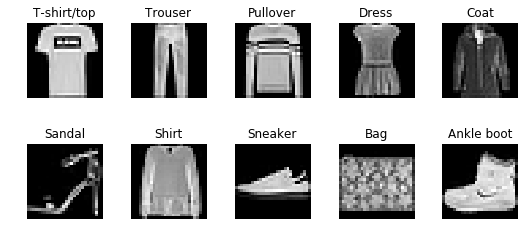

In [12]:
plot_data(X_train,Y_train,description,pos = pos)

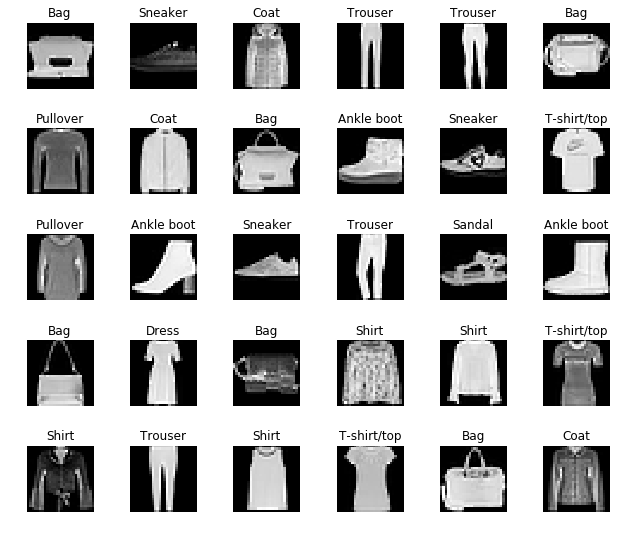

In [13]:
plot_data(X_train,Y_train,description)

Keys:  [0, 6, 2, 4]


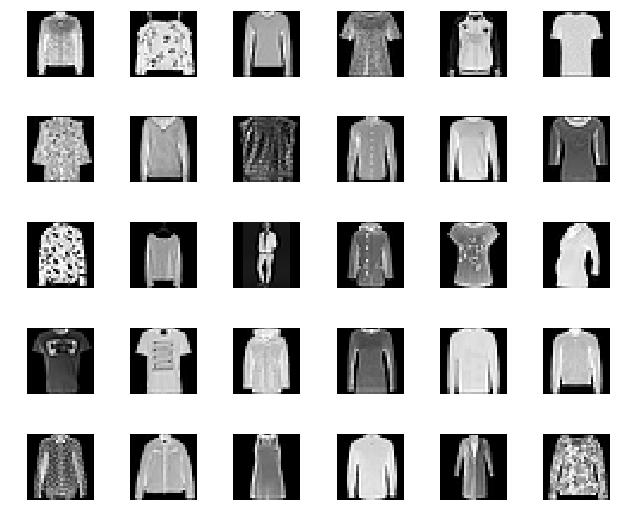

In [14]:
# Impossible to distinguish between T-shirt,Shirt,Pullover,Coat
indices = []
indices.append(list(description.values()).index('T-shirt/top'))
indices.append(list(description.values()).index('Shirt'))
indices.append(list(description.values()).index('Pullover'))
indices.append(list(description.values()).index('Coat'))
print('Keys: ',indices)
val = np.where(np.isin(Y_train,indices) == True)[0]
plot_data(X_train,Y_train,description=None,num=30,pos=val)

In [15]:
def horizontal_flip(X):
    
    flip_X = X.T.reshape(-1,28,28)
    flip_X = flip_X[:,:,::-1]
    flip_X = flip_X.reshape(-1,28*28)
    return flip_X.T

In [16]:
flip_X = horizontal_flip(X_train)

In [17]:
flip_X.shape

(784, 60000)

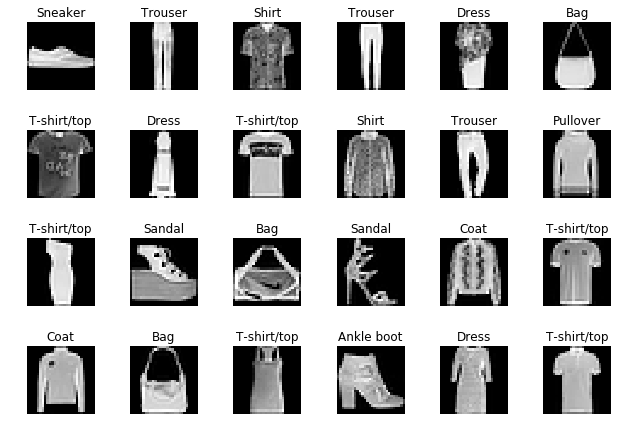

In [18]:
plot_data(flip_X,Y_train,description,num=24)

In [20]:
X_train = np.c_[X_train,flip_X]

X_train.shape

(784, 120000)

In [21]:
Y_train = np.append(Y_train,Y_train)

Y_train.shape

(120000,)

In [22]:
X_train = X_train/255

Yhot_train = one_hot_matrix(Y_train,C)

In [23]:
Yhot_train.shape

(10, 120000)

In [31]:
# Loading test set
# Performing the same preprocessing on the test set 
images,labels = data.load_testing()
X_test = np.array(images).T/255
Y_test = np.array(labels)

In [32]:
X_test.shape,Y_test.shape

((784, 10000), (10000,))

In [26]:
# Sanity checking params_initialization
tf.reset_default_graph()
layers = [X_train.shape[0],25,12,C]
params = params_initialization(layers,0.0)
print("W1 = " + str(params["W1"]))
print("b1 = " + str(params["b1"]))
print("W2 = " + str(params["W2"]))
print("b2 = " + str(params["b2"]))
print("W3 = " + str(params["W3"]))
print("b3 = " + str(params["b3"]))

INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
W1 = <tf.Variable 'W1:0' shape=(25, 784) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>
W3 = <tf.Variable 'W3:0' shape=(10, 12) dtype=float32_ref>
b3 = <tf.Variable 'b3:0' shape=(10, 1) dtype=float32_ref>


In [29]:
# Sanity checking forward propagation
tf.reset_default_graph()
X = tf.placeholder(tf.float32,shape=(X_train.shape),name='X')
with tf.Session() as sess:
    params = params_initialization(layers,0.0)
    ZL = forward_propagation(X,params)
    print ("ZL = "+str(ZL))    

INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
ZL = Tensor("add_2:0", shape=(10, 120000), dtype=float32)
